# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [35]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,313677,313678,313679,313680,313681,313682,313683,313684,313685,313686
dateCrawled,2016-03-24 11:52:17,2016-03-23 10:58:45,2016-03-14 12:52:21,2016-03-17 16:54:04,2016-03-31 17:25:20,2016-04-04 17:36:23,2016-04-01 20:48:51,2016-03-21 18:54:38,2016-03-17 10:53:50,2016-03-26 19:54:18,...,2016-04-04 09:57:12,2016-03-28 13:48:07,2016-04-02 20:37:03,2016-03-19 19:53:49,2016-03-27 20:36:20,2016-03-21 09:50:58,2016-03-14 17:48:27,2016-03-05 19:56:21,2016-03-19 18:57:12,2016-03-20 19:41:08
name,Golf_3_1.6,A5_Sportback_2.7_Tdi,"Jeep_Grand_Cherokee_""Overland""",GOLF_4_1_4__3TÃRER,Skoda_Fabia_1.4_TDI_PD_Classic,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,Peugeot_206_CC_110_Platinum,VW_Derby_Bj_80__Scheunenfund,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,Mazda_3_1.6_Sport,...,Volkswagen_Lupo_1.0,Volkswagen_Golf_2.0_TDI_DPF_Team,Bmw_320_D_DPF_Touring_!!!,turbo_defekt,Opel_Zafira_1.6_Elegance_TÃV_12/16,Mitsubishi_Cold,Suche_t4___vito_ab_6_sitze,Smart_smart_leistungssteigerung_100ps,Volkswagen_Multivan_T4_TDI_7DC_UY2,VW_Golf_Kombi_1_9l_TDI
seller,privat,privat,privat,privat,privat,privat,privat,privat,privat,privat,...,privat,privat,privat,privat,privat,privat,privat,privat,privat,privat
offerType,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,...,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer
price,480,18300,9800,1500,3600,650,2200,0,999,2000,...,1490,7900,3999,3200,1150,0,2200,1199,9200,3400
abtest,test,test,test,test,test,test,test,test,test,control,...,control,test,test,control,control,control,test,test,test,test
vehicleType,Other,coupe,suv,kleinwagen,kleinwagen,limousine,cabrio,limousine,kleinwagen,limousine,...,kleinwagen,limousine,kombi,limousine,bus,Other,Other,cabrio,bus,kombi
yearOfRegistration,1993,2011,2004,2001,2008,1995,2004,1980,1998,2004,...,1998,2010,2005,2004,2000,2005,2005,2000,1996,2002
gearbox,manuell,manuell,automatik,manuell,manuell,manuell,manuell,manuell,manuell,manuell,...,manuell,manuell,manuell,manuell,manuell,manuell,Unspecified,automatik,manuell,manuell
powerPS,0,190,163,75,69,102,109,50,101,105,...,50,140,3,225,0,0,0,101,102,100


In [61]:
# Calcule a média de preço por marca e por veículo
Result = pd.DataFrame()                   #Cria um novo dataframe vazio
for Br in list(df["brand"].unique()):     #Cria uma lista de cada marca do dataframe df
    for Ve in list(df["vehicleType"].unique()): #Cria uma listaa de cada tipo de veiculo do dataframe df
        Av = df[(df["brand"] == Br) & (df["vehicleType"] == Ve)]["price"].mean() #Calcula a média do preço para cada tipo de carro e marca
        Result = Result.append(pd.DataFrame({'brand':Br , 'vehicleType':Ve , 'avgPrice':Av}, index=[0]))#Cria três colunas no novo dataframe
Result = Result.reset_index() #Reinicia o indice 
del Result["index"]           #Deleta a coluna index
Result["avgPrice"].fillna(0,inplace=True)
Result["avgPrice"].isnull().value_counts()
Result["avgPrice"] = Result["avgPrice"].astype(int)
Result.head()

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

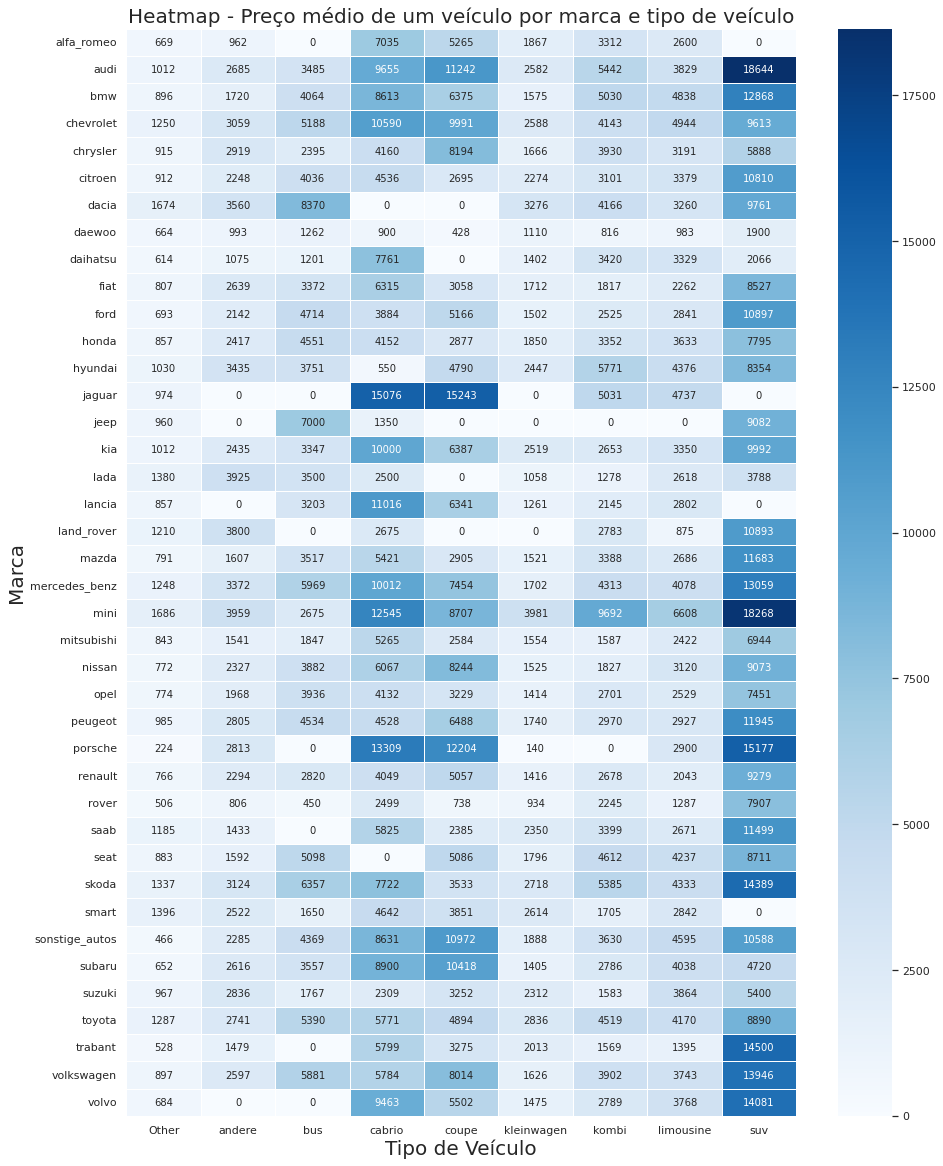

In [69]:
fig, ax = plt.subplots(figsize=(15,20))
Heat = Result.pivot("brand","vehicleType", "avgPrice")
sns.heatmap(Heat,linewidths=1,cmap="Blues",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()

In [70]:
# Salvando o plot
fig.savefig("plots/Analise4/Marca-veiculo-preço.png")

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>